# Part 1: Web Scraping

This section contains the script to scrape job data from Wuzzuf.net.

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib.parse
import time 

job_names = ["Data Engineer", "Data Analyst", "Data Scientist", "AI Engineer", 
             "Backend Developer", "Frontend Developer", "Software Engineer", 
             "Network Engineer", "DevOps Engineer", "Full Stack Developer"]

searched_job_role = []
job_title, company, Country, City, Area, publish_time, Link, Job_type, work_place = [], [], [], [], [], [], [], [], []

for job_name in job_names:
    page = 0
    print(f"--- Searching for: {job_name} ---")
    
    while True:
        parsed_job = urllib.parse.quote(job_name)
        
        url = f'https://wuzzuf.net/search/jobs/?a=hpb%7Cspbg&q={parsed_job}&start={page}'
        
        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            job_cards = soup.find_all('div', class_='css-ghe2tq e1v1l3u10') 
            if len(job_cards) == 0:
                print(f"No more jobs found for {job_name} at page {page}. Moving to next job category.")
                break 
            
            for card in job_cards:
                searched_job_role.append(job_name)

                jobTitle = card.find("h2", class_="css-193uk2c")
                job_title.append(jobTitle.text.strip() if jobTitle else "none")

                company_name = card.find("a", class_="css-ipsyv7")
                company.append(company_name.text.strip().replace("-", "") if company_name else "none")
                
                location = card.find("span", class_="css-16x61xq")
                if location:
                    loc_parts = location.text.split(',')
                    Country.append(loc_parts[-1].strip() if len(loc_parts) > 0 else "none")
                    City.append(loc_parts[0].strip() if len(loc_parts) > 1 else "none")
                    Area.append(loc_parts[1].strip() if len(loc_parts) > 2 else "none")
                else:
                    Country.append("none")
                    City.append("none")
                    Area.append("none")
                
                publishTime = card.select_one("div[class*='css-eg55jf']") 
                if publishTime:
                    publish_time.append(publishTime.get_text(strip=True)) 
                else:
                    publish_time.append("none")
                
                job_link = card.find("a", class_="css-o171kl")
                Link.append(job_link.get('href') if job_link else "none")
                
                jobType = card.find("span", class_="css-uc9rga eoyjyou0")
                Job_type.append(jobType.text.strip() if jobType else "none")
                
                workPlace = card.select_one("span[class*='css-uofntu eoyjyou0']")
                if workPlace:
                    work_place.append(workPlace.get_text(strip=True))
                else:
                    work_place.append("none")

            print(f"Scraped {job_name}: Page {page} done. Total jobs so far: {len(job_title)}")
            
            page += 1 

        except Exception as e:
            print(f"Error occurring at page {page} for {job_name}: {e}")
            break

file_name = 'jobs_wuzzuf.csv'
df = pd.DataFrame({
    'Searched Job': searched_job_role, 
    'Job Title': job_title,
    'Company': company,
    'Country': Country, 
    'City': City,
    'Area': Area,
    'Publish Time': publish_time,
    'Job Link': Link,
    'Job Type': Job_type,
    'Work Place': work_place,
    'Scraping date': pd.Timestamp.now().date()
})

file_path = os.path.join(os.getcwd(), file_name)
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print(f"File saved at: {file_path}")
print(f"Total jobs scraped: {len(df)}")

# Part 2: Data Cleaning

This section processes the raw CSV data to clean and format it for analysis.

In [2]:
import pandas as pd
import re
import numpy as np
import string
df = pd.read_csv("jobs_wuzzuf.csv")

In [3]:
df

,Searched Job,Job Title,Company,Country,City,Area,Publish Time,Job Link,Job Type,Work Place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,none,7 daysago,https://wuzzuf.net/jobs/p/mxdf7qyu1hph-data-en...,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Giza,none,https://wuzzuf.net/jobs/p/5vodgef9vqf8-data-wa...,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,none,none,https://wuzzuf.net/jobs/p/p6wmvir6olpv-senior-...,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Giza,none,https://wuzzuf.net/jobs/p/q2m5fcckjvbf-big-dat...,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,none,2 daysago,https://wuzzuf.net/jobs/p/zexu8p4gqaer-pmo-eng...,Full Time,On-site,2025-12-04
...,...,...,...,...,...,...,...,...,...,...,...
6239,Full Stack Developer,Site Logistic Manager,Energy Job Search,United Arab Emirates,Dubai,none,none,https://wuzzuf.net/jobs/p/g/9putmlmgatd3-site-...,Full Time,none,2025-12-04
6240,Full Stack Developer,Risk Data Science Senior Manager,Visa,United Arab Emirates,Dubai,none,4 hoursago,https://wuzzuf.net/jobs/p/g/bx5yokixwsgm-risk-...,Full Time,none,2025-12-04
6241,Full Stack Developer,Group Director - Learning Innovation and Progr...,DP World,United Arab Emirates,Dubai,none,none,https://wuzzuf.net/jobs/p/g/vk7korcxnxno-group...,Full Time,none,2025-12-04
6242,Full Stack Developer,A-Player Interns - Paradox,Paradox EN,United Arab Emirates,Dubai,none,5 daysago,https://wuzzuf.net/jobs/p/g/vjeaojxe2shg-a-pla...,Full Time,none,2025-12-04


In [4]:
df.head()

,Searched Job,Job Title,Company,Country,City,Area,Publish Time,Job Link,Job Type,Work Place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,none,7 daysago,https://wuzzuf.net/jobs/p/mxdf7qyu1hph-data-en...,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Giza,none,https://wuzzuf.net/jobs/p/5vodgef9vqf8-data-wa...,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,none,none,https://wuzzuf.net/jobs/p/p6wmvir6olpv-senior-...,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Giza,none,https://wuzzuf.net/jobs/p/q2m5fcckjvbf-big-dat...,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,none,2 daysago,https://wuzzuf.net/jobs/p/zexu8p4gqaer-pmo-eng...,Full Time,On-site,2025-12-04


In [5]:
df.tail()

,Searched Job,Job Title,Company,Country,City,Area,Publish Time,Job Link,Job Type,Work Place,Scraping date
6239,Full Stack Developer,Site Logistic Manager,Energy Job Search,United Arab Emirates,Dubai,none,none,https://wuzzuf.net/jobs/p/g/9putmlmgatd3-site-...,Full Time,none,2025-12-04
6240,Full Stack Developer,Risk Data Science Senior Manager,Visa,United Arab Emirates,Dubai,none,4 hoursago,https://wuzzuf.net/jobs/p/g/bx5yokixwsgm-risk-...,Full Time,none,2025-12-04
6241,Full Stack Developer,Group Director - Learning Innovation and Progr...,DP World,United Arab Emirates,Dubai,none,none,https://wuzzuf.net/jobs/p/g/vk7korcxnxno-group...,Full Time,none,2025-12-04
6242,Full Stack Developer,A-Player Interns - Paradox,Paradox EN,United Arab Emirates,Dubai,none,5 daysago,https://wuzzuf.net/jobs/p/g/vjeaojxe2shg-a-pla...,Full Time,none,2025-12-04
6243,Full Stack Developer,Senior Director of Digital Marketing,DigitalOcean,United Arab Emirates,Dubai,none,none,https://wuzzuf.net/jobs/p/g/qb1y6xdbdgi8-senio...,Full Time,none,2025-12-04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Searched Job   6244 non-null   object
 1   Job Title      6244 non-null   object
 2   Company        6244 non-null   object
 3   Country        6244 non-null   object
 4   City           6244 non-null   object
 5   Area           6244 non-null   object
 6   Publish Time   6244 non-null   object
 7   Job Link       6244 non-null   object
 8   Job Type       6244 non-null   object
 9   Work Place     6244 non-null   object
 10  Scraping date  6244 non-null   object
dtypes: object(11)
memory usage: 536.7+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Searched Job     0
Job Title        0
Company          0
Country          0
City             0
Area             0
Publish Time     0
Job Link         0
Job Type         0
Work Place       0
Scraping date    0
dtype: int64

In [9]:
df['Scraping date'] = pd.to_datetime(df['Scraping date'])

In [10]:
df.rename(columns= {"Sraping date" : "Scraping_date",
                    "Job Title": "Job_title",
                    "Publish Time" : "Publish_time",
                    "Job Type" : "Job_type",
                    "Work Place" : "Work_place",
                    "Searched Job" : "Job"}, inplace= True)

In [11]:
df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x, axis= 0)
df.replace("none",np.nan, inplace= True)
df

,Job,Job_title,Company,Country,City,Area,Publish_time,Job Link,Job_type,Work_place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,NaN,7 daysago,https://wuzzuf.net/jobs/p/mxdf7qyu1hph-data-en...,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Giza,NaN,https://wuzzuf.net/jobs/p/5vodgef9vqf8-data-wa...,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,NaN,NaN,https://wuzzuf.net/jobs/p/p6wmvir6olpv-senior-...,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Giza,NaN,https://wuzzuf.net/jobs/p/q2m5fcckjvbf-big-dat...,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,NaN,2 daysago,https://wuzzuf.net/jobs/p/zexu8p4gqaer-pmo-eng...,Full Time,On-site,2025-12-04
...,...,...,...,...,...,...,...,...,...,...,...
6239,Full Stack Developer,Site Logistic Manager,Energy Job Search,United Arab Emirates,Dubai,NaN,NaN,https://wuzzuf.net/jobs/p/g/9putmlmgatd3-site-...,Full Time,NaN,2025-12-04
6240,Full Stack Developer,Risk Data Science Senior Manager,Visa,United Arab Emirates,Dubai,NaN,4 hoursago,https://wuzzuf.net/jobs/p/g/bx5yokixwsgm-risk-...,Full Time,NaN,2025-12-04
6241,Full Stack Developer,Group Director - Learning Innovation and Progr...,DP World,United Arab Emirates,Dubai,NaN,NaN,https://wuzzuf.net/jobs/p/g/vk7korcxnxno-group...,Full Time,NaN,2025-12-04
6242,Full Stack Developer,A-Player Interns - Paradox,Paradox EN,United Arab Emirates,Dubai,NaN,5 daysago,https://wuzzuf.net/jobs/p/g/vjeaojxe2shg-a-pla...,Full Time,NaN,2025-12-04


In [12]:
df.isnull().sum()

Job                 0
Job_title           0
Company             0
Country             0
City                0
Area             3865
Publish_time     4901
Job Link            0
Job_type            0
Work_place       3148
Scraping date       0
dtype: int64

In [13]:
df.drop(columns= ['Area', 'Publish_time', 'Job Link'], inplace= True)

In [14]:
df['Work_place']= df['Work_place'].fillna('Undefined')
df

,Job,Job_title,Company,Country,City,Job_type,Work_place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,Full Time,On-site,2025-12-04
...,...,...,...,...,...,...,...,...
6239,Full Stack Developer,Site Logistic Manager,Energy Job Search,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6240,Full Stack Developer,Risk Data Science Senior Manager,Visa,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6241,Full Stack Developer,Group Director - Learning Innovation and Progr...,DP World,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6242,Full Stack Developer,A-Player Interns - Paradox,Paradox EN,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04


In [15]:
def clean_text(text):
    if pd.isna(text) or text == "":
        return ""
    
    text = str(text)
    pattern = f"[{re.escape(string.punctuation)}]"
    text = re.sub(pattern, ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [17]:
cols = ['Job','Job_title','Country', 'City', 'Job_type']
df[cols] = df[cols].applymap(clean_text)
df

C:\Users\Menna Elfuomy\AppData\Local\Temp\ipykernel_7092\1642966341.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(clean_text)


,Job,Job_title,Company,Country,City,Job_type,Work_place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,Full Time,On-site,2025-12-04
...,...,...,...,...,...,...,...,...
6239,Full Stack Developer,Site Logistic Manager,Energy Job Search,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6240,Full Stack Developer,Risk Data Science Senior Manager,Visa,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6241,Full Stack Developer,Group Director Learning Innovation and Program...,DP World,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6242,Full Stack Developer,A Player Interns Paradox,Paradox EN,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04


In [18]:
df['Job'].value_counts()

Job
Software Engineer       2587
Data Engineer           1452
Network Engineer         751
Data Analyst             340
AI Engineer              313
Backend Developer        234
Frontend Developer       206
Full Stack Developer     174
DevOps Engineer          130
Data Scientist            57
Name: count, dtype: int64

In [19]:
df['Job_title'].value_counts()

Job_title
Mechanical Engineer                          31
IT Manager                                   29
Sales Engineer                               27
Production Engineer                          25
Senior Full Stack Developer                  25
                                             ..
Business Development Manager Riyadh based     1
Manager Account Management                    1
Partnership Sales Lead                        1
GRC Cloud Security Analyst                    1
Architect Urban Designer                      1
Name: count, Length: 2757, dtype: int64

In [20]:
df['City'].value_counts()

City
Dubai             1559
Riyadh            1472
Cairo              423
New Cairo          406
Nasr City          330
                  ... 
Sharm Alsheikh       1
Tbilisi              1
Somerville           1
New Delhi            1
Daly City            1
Name: count, Length: 144, dtype: int64

In [21]:
df['Country'].value_counts()

Country
Egypt                   2913
Saudi Arabia            1663
United Arab Emirates    1589
United States             26
Libya                     11
Canada                    10
United Kingdom             6
Turkey                     6
Australia                  6
Ghana                      3
Germany                    2
Belgium                    2
South Africa               2
Qatar                      1
Indonesia                  1
Kuwait                     1
Georgia                    1
India                      1
Name: count, dtype: int64

In [22]:
df['Work_place'].value_counts()

Work_place
Undefined    3148
On-site      2324
Hybrid        451
Remote        321
Name: count, dtype: int64

In [23]:
df.head()

,Job,Job_title,Company,Country,City,Job_type,Work_place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,Full Time,On-site,2025-12-04


In [24]:
df.to_csv("Cleaned_jobs without nulls.csv", index = False, encoding= 'utf-8')

# Part 3: Data Analysis & Visualization

This section performs EDA and visualizes the insights from the cleaned data.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv("Cleaned_jobs without nulls.csv")
df.head()

,Job,Job_title,Company,Country,City,Job_type,Work_place,Scraping date
0,Data Engineer,Data Engineer,HiRemoters,Egypt,Cairo,Full Time,Remote,2025-12-04
1,Data Engineer,Data warehouse Extraction Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
2,Data Engineer,Senior Data Base Engineer,Amreyah Cement,Egypt,Cairo,Full Time,On-site,2025-12-04
3,Data Engineer,Big Data Engineer,Efada Technology,Egypt,6th of October,Full Time,Hybrid,2025-12-04
4,Data Engineer,PMO Engineers,GMC,Egypt,Cairo,Full Time,On-site,2025-12-04


In [27]:
df.tail(10)


,Job,Job_title,Company,Country,City,Job_type,Work_place,Scraping date
6234,Full Stack Developer,Senior Growth Marketer,Gameball,Egypt,Cairo,Full Time,Remote,2025-12-04
6235,Full Stack Developer,Automation Specialist Intelligent Automation A...,Saudi Diesel Equipment Company,Saudi Arabia,Riyadh,Full Time,Undefined,2025-12-04
6236,Full Stack Developer,Dishwasher,Marriott International,Saudi Arabia,Riyadh,Full Time,Undefined,2025-12-04
6237,Full Stack Developer,Staff Engineer Dubai,Sokin,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6238,Full Stack Developer,Regional Manager Middle East,IQM Quantum Computers,Saudi Arabia,Riyadh,Freelance Project,Undefined,2025-12-04
6239,Full Stack Developer,Site Logistic Manager,Energy Job Search,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6240,Full Stack Developer,Risk Data Science Senior Manager,Visa,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6241,Full Stack Developer,Group Director Learning Innovation and Program...,DP World,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6242,Full Stack Developer,A Player Interns Paradox,Paradox EN,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04
6243,Full Stack Developer,Senior Director of Digital Marketing,DigitalOcean,United Arab Emirates,Dubai,Full Time,Undefined,2025-12-04


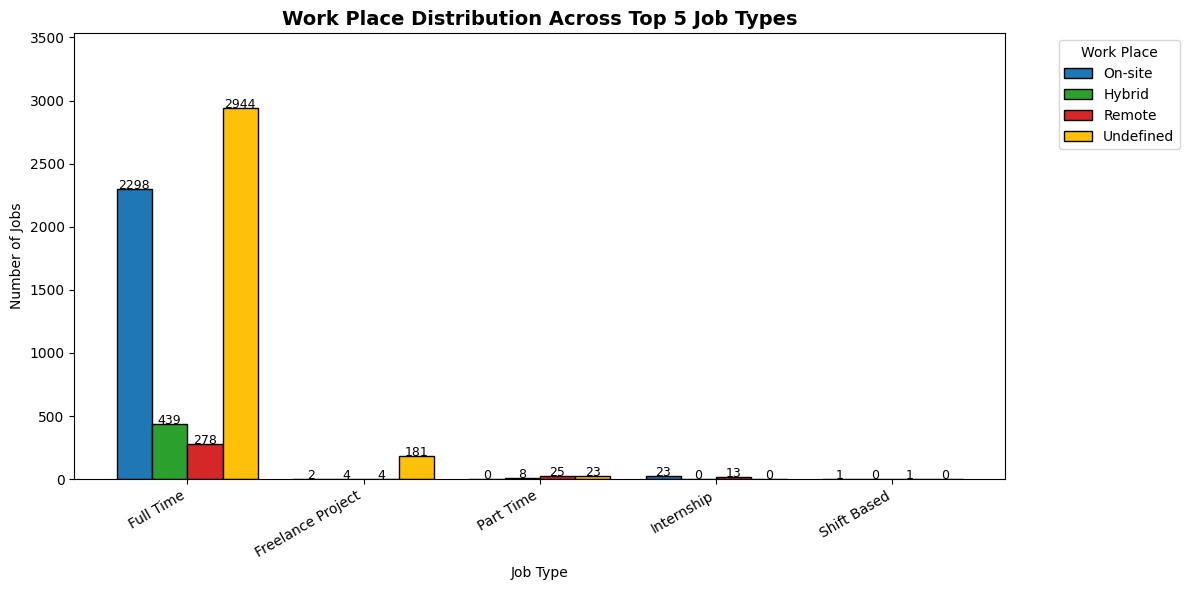

In [28]:
top_job_types = df['Job_type'].value_counts().head(5).index
work_places = ['On-site', 'Hybrid', 'Remote', 'Undefined']
color_map = {
    'On-site':   '#1f77b4',
    'Hybrid':    '#2ca02c',
    'Remote':    '#d62728',
    'Undefined': '#FFC107'
}
grouped_data = df[df['Job_type'].isin(top_job_types)].groupby(['Job_type', 'Work_place']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[top_job_types, work_places]  # Ensures consistent order
x = np.arange(len(top_job_types))
width = 0.20
plt.figure(figsize=(12,6))
for i, wp in enumerate(work_places):
    values = grouped_data[wp]

    plt.bar(
        x + i*width,
        values,
        width=width,
        label=wp,
        color=color_map[wp],
        edgecolor='black'
    )

    for j, val in enumerate(values):
        plt.text(
            x[j] + i*width,
            val + 0.2,
            str(int(val)),
            ha='center',
            fontsize=9
        )

plt.xticks(x + width*1.5, top_job_types, rotation=30, ha='right')
plt.ylabel("Number of Jobs")
plt.xlabel("Job Type")
plt.title("Work Place Distribution Across Top 5 Job Types", fontsize=14, fontweight='bold')
plt.legend(title="Work Place", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, grouped_data.values.max() * 1.20)
plt.tight_layout()
plt.show()

In [29]:
print("""

1)Most companies do not clearly specify the work arrangement (“Undefined”), which negatively affects the clarity of job postings for users.

2)The full-time job market leans strongly toward On-site work, reflecting a limited adoption of hybrid or remote models.

3)Part-time jobs show the highest readiness for remote work compared to other job types.

4)Internships require support from the platform since most of them are On-site; enhancing search or filtering options could be beneficial for users.

5)The data indicates a strong opportunity to improve the posting experience on the platform by encouraging companies to clearly define the Work Place.
""")



1)Most companies do not clearly specify the work arrangement (“Undefined”), which negatively affects the clarity of job postings for users.

2)The full-time job market leans strongly toward On-site work, reflecting a limited adoption of hybrid or remote models.

3)Part-time jobs show the highest readiness for remote work compared to other job types.

4)Internships require support from the platform since most of them are On-site; enhancing search or filtering options could be beneficial for users.

5)The data indicates a strong opportunity to improve the posting experience on the platform by encouraging companies to clearly define the Work Place.



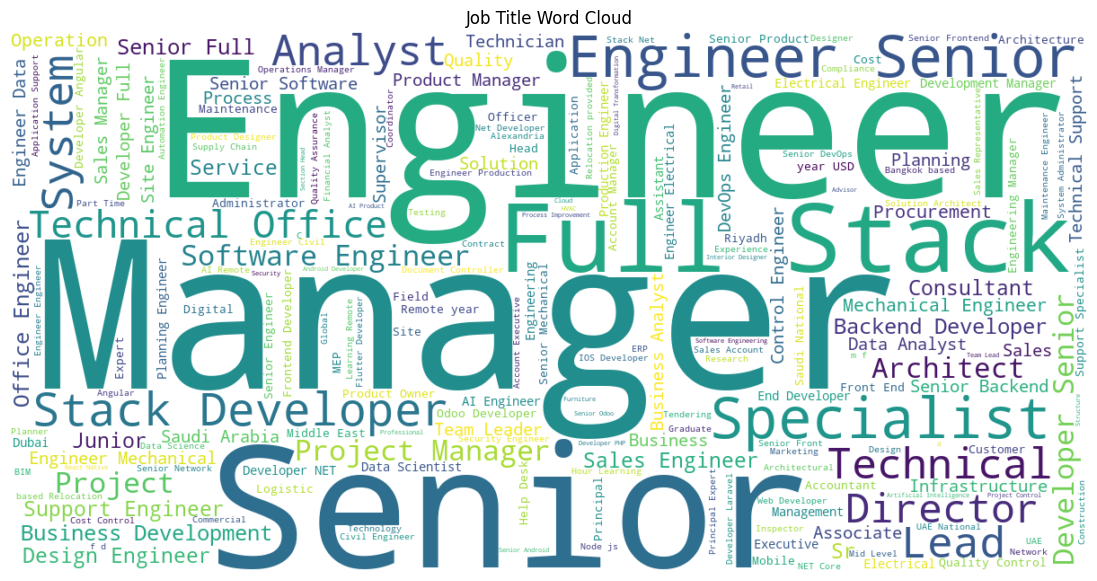

In [30]:
from wordcloud import WordCloud
text = " ".join(df['Job_title'].astype(str))
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Job Title Word Cloud")
plt.show()


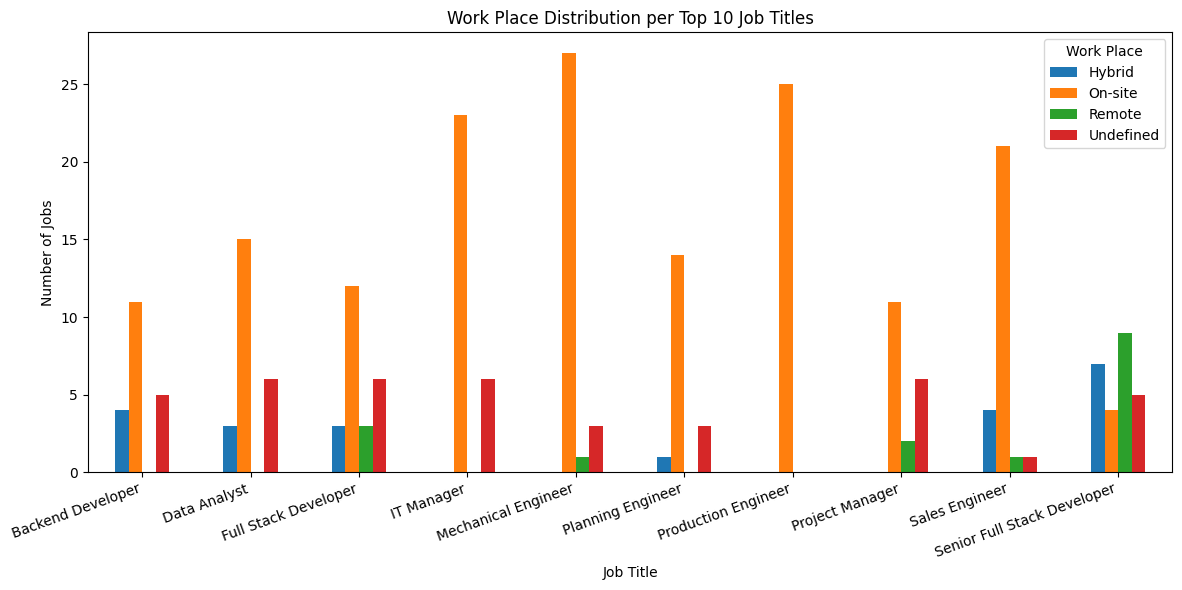

In [31]:
top_titles = df['Job_title'].value_counts().head(10).index
subset = df[df['Job_title'].isin(top_titles)]
pivot = subset.pivot_table(index='Job_title', columns='Work_place', aggfunc='size', fill_value=0)
pivot.plot(kind='bar', figsize=(12,6))
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.title('Work Place Distribution per Top 10 Job Titles')
plt.xticks(rotation=20, ha='right')
plt.legend(title='Work Place')
plt.tight_layout()
plt.show()


In [32]:
print("""
1)Most job titles show a strong preference for On-site work, especially engineering and managerial roles that require physical presence.

2)Technical roles — particularly Senior Full Stack Developer — offer the highest availability of Remote and Hybrid work options.

3)Several job titles have a notable number of Undefined work-place listings, indicating that many companies are not clearly specifying the work arrangement in their job posts.

4)Engineering roles (Mechanical, Planning, Production, etc.) are consistently On-site, reflecting the hands-on nature of the work.

5)Managerial roles like IT Manager are almost entirely On-site, showing limited flexibility.

6)Overall, the data suggests an opportunity to improve job posting clarity by encouraging companies to define work-place type more explicitly.""")


1)Most job titles show a strong preference for On-site work, especially engineering and managerial roles that require physical presence.

2)Technical roles — particularly Senior Full Stack Developer — offer the highest availability of Remote and Hybrid work options.

3)Several job titles have a notable number of Undefined work-place listings, indicating that many companies are not clearly specifying the work arrangement in their job posts.

4)Engineering roles (Mechanical, Planning, Production, etc.) are consistently On-site, reflecting the hands-on nature of the work.

5)Managerial roles like IT Manager are almost entirely On-site, showing limited flexibility.

6)Overall, the data suggests an opportunity to improve job posting clarity by encouraging companies to define work-place type more explicitly.


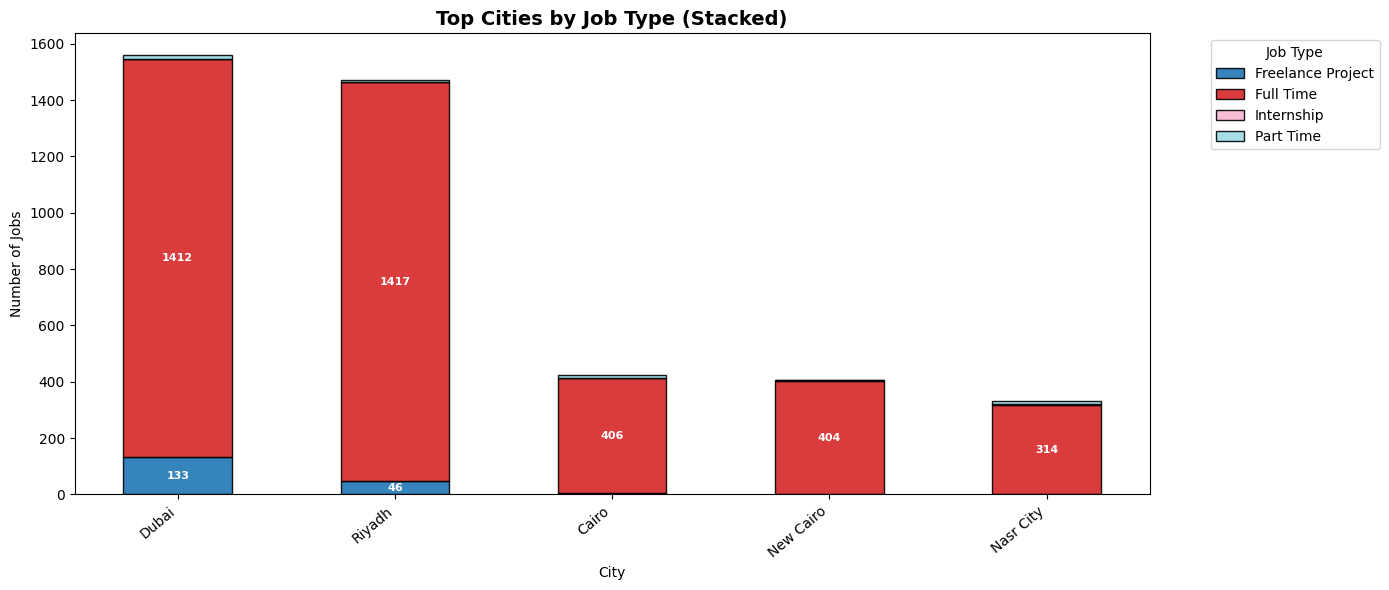

In [33]:
top_cities = df['City'].value_counts().head(5).index
grouped_data = df[df['City'].isin(top_cities)].groupby(['City', 'Job_type']).size().unstack(fill_value=0)
grouped_data = grouped_data.loc[top_cities] 

job_types_cols = grouped_data.columns
colors = plt.cm.tab20(np.linspace(0, 1, len(job_types_cols)))

plt.figure(figsize=(14, 6))

bottom_y = np.zeros(len(top_cities))
width = 0.5  
threshold = 20 

for i, jt in enumerate(job_types_cols):
    values = grouped_data[jt].values
    
    plt.bar(
        top_cities, 
        values,
        width=width,
        label=jt,
        color=colors[i],
        edgecolor='black',
        alpha=0.9,
        bottom=bottom_y  
    )

    for j, val in enumerate(values):
        if val > threshold:
            plt.text(
                j, 
                bottom_y[j] + val / 2, 
                str(int(val)), 
                ha='center', 
                va='center', 
                fontsize=8, 
                color='white', 
                fontweight='bold'
            )

    bottom_y += values

plt.ylabel("Number of Jobs")
plt.xlabel("City")
plt.title("Top Cities by Job Type (Stacked)", fontsize=14, fontweight='bold')
plt.xticks(rotation=40, ha='right')

plt.legend(title="Job Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
print("""
1)Saudi Arabia and the UAE are the largest markets across almost all job types, especially full-time and freelance roles.

2)Egypt is strong in internship opportunities and has a solid presence in some full-time jobs.

3)Internship opportunities are highly localized within Egypt, mainly concentrated in university-based cities.

4)Freelance and part-time jobs are primarily concentrated in Gulf cities, with much higher demand compared to Egypt.

5)Shift-based jobs are very limited and have minimal impact on the overall job market compared to other job types."""
)


1)Saudi Arabia and the UAE are the largest markets across almost all job types, especially full-time and freelance roles.

2)Egypt is strong in internship opportunities and has a solid presence in some full-time jobs.

3)Internship opportunities are highly localized within Egypt, mainly concentrated in university-based cities.

4)Freelance and part-time jobs are primarily concentrated in Gulf cities, with much higher demand compared to Egypt.

5)Shift-based jobs are very limited and have minimal impact on the overall job market compared to other job types.


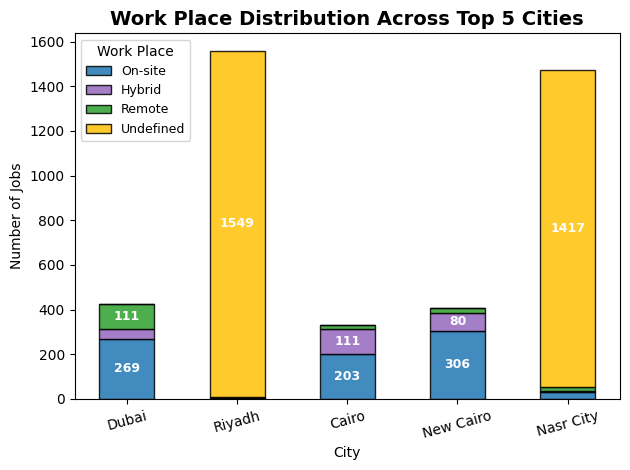

In [35]:
top_cities = df['City'].value_counts().head(5).index
work_places = ['On-site', 'Hybrid', 'Remote', 'Undefined']
color_map = {
    'On-site': '#1f77b4',
    'Hybrid':  '#9467bd',
    'Remote':  '#2ca02c',
    'Undefined': '#FFC107'
}

grouped_data = df[df['City'].isin(top_cities)].groupby(['City', 'Work_place']).size().unstack(fill_value=0)
grouped_data = grouped_data[work_places]

bottom_y = np.zeros(len(top_cities)) 
bar_width = 0.5   
threshold = 50    

for wp in work_places:
    values = grouped_data[wp].values
    
    plt.bar(
        top_cities,          
        values,
        width=bar_width,    
        label=wp,
        color=color_map[wp],
        edgecolor='black',
        alpha=0.85,
        bottom=bottom_y     
    )

    for j, val in enumerate(values):
        if val > threshold:  
            plt.text(
                j, 
                bottom_y[j] + val / 2, 
                str(int(val)),
                ha='center',
                va='center',
                fontsize=9,
                color='white',      
                fontweight='bold'
            )

    bottom_y += values

plt.ylabel("Number of Jobs")
plt.xlabel("City")
plt.title("Work Place Distribution Across Top 5 Cities", fontsize=14, fontweight='bold')
plt.legend(title="Work Place", fontsize=9)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [36]:
print("""
1)Gulf data is incomplete — major cities like Dubai, Riyadh, and Mecca often show “Not Specified” for workplace type.

2)In Egypt, most jobs are On-site, especially across major cities.

3)New Cairo has the highest number of on-site jobs (306).

4)Workplace flexibility (Remote/Hybrid) appears mainly in central urban areas.

5)Cairo has the highest number of Remote jobs (111).

6)Nasr City has the highest number of Hybrid jobs (111).

7)Smaller or outer cities (e.g., 10th of Ramadan, Obour) show very little flexibility — jobs are mostly on-site only.""")


1)Gulf data is incomplete — major cities like Dubai, Riyadh, and Mecca often show “Not Specified” for workplace type.

2)In Egypt, most jobs are On-site, especially across major cities.

3)New Cairo has the highest number of on-site jobs (306).

4)Workplace flexibility (Remote/Hybrid) appears mainly in central urban areas.

5)Cairo has the highest number of Remote jobs (111).

6)Nasr City has the highest number of Hybrid jobs (111).

7)Smaller or outer cities (e.g., 10th of Ramadan, Obour) show very little flexibility — jobs are mostly on-site only.


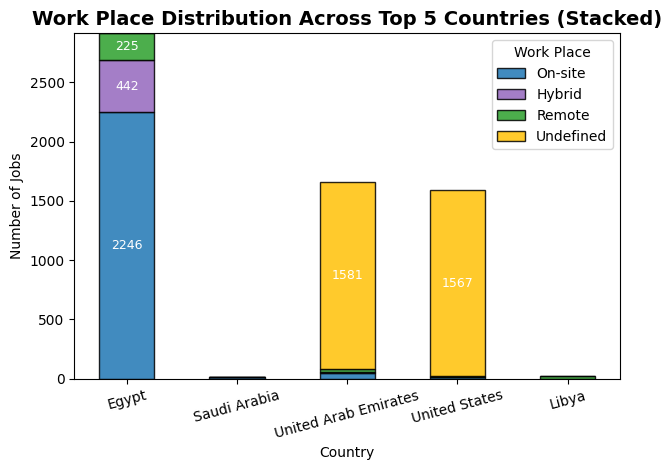

In [37]:
top_countries = df['Country'].value_counts().head(5).index
work_places = ['On-site', 'Hybrid', 'Remote', 'Undefined']
color_map = {
    'On-site': '#1f77b4',
    'Hybrid':  '#9467bd',
    'Remote':  '#2ca02c',
    'Undefined': '#FFC107'
}

grouped_data = df[df['Country'].isin(top_countries)].groupby(['Country', 'Work_place']).size().unstack(fill_value=0)
grouped_data = grouped_data[work_places] 
bottom_y = np.zeros(len(top_countries))

threshold = 100

for wp in work_places:
    values = grouped_data[wp].values
    
    plt.bar(
        top_countries,       
        values,              
        label=wp,            
        color=color_map[wp], 
        edgecolor='black',   
        alpha=0.85,          
        bottom=bottom_y,
        width= 0.5    
    )

    for j, val in enumerate(values):
        if val > threshold:
            plt.text(
                j,                       
                bottom_y[j] + val / 2,   
                str(int(val)),           
                ha='center',             
                va='center',             
                fontsize=9,              
                color='white'
                )

    bottom_y += values

plt.ylabel("Number of Jobs")
plt.xlabel("Country")
plt.title("Work Place Distribution Across Top 5 Countries (Stacked)", fontsize=14, fontweight='bold')
plt.legend(title="Work Place")
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

In [38]:
print("""
1)You should focus on only three countries for the detailed analysis: Egypt, Saudi Arabia, and the United Arab Emirates.

2)Egypt has a clearly defined On-site–dominant job market.

3)Saudi Arabia and the UAE have a large number of jobs with undefined Work Place, which significantly affects data quality.

4)Countries such as the United States and Canada show the highest adoption of remote work.

5)The remaining countries have very limited data and do not provide meaningful insights for the analysis.""")


1)You should focus on only three countries for the detailed analysis: Egypt, Saudi Arabia, and the United Arab Emirates.

2)Egypt has a clearly defined On-site–dominant job market.

3)Saudi Arabia and the UAE have a large number of jobs with undefined Work Place, which significantly affects data quality.

4)Countries such as the United States and Canada show the highest adoption of remote work.

5)The remaining countries have very limited data and do not provide meaningful insights for the analysis.


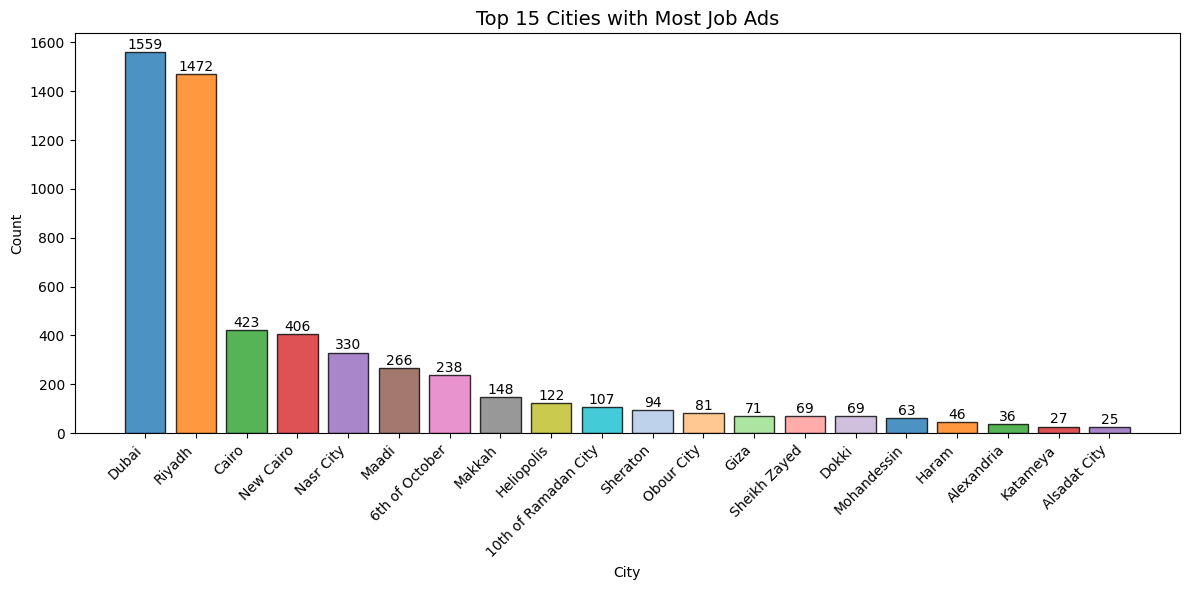

In [39]:

cities = df['City'].value_counts().head(20)
plt.figure(figsize=(12,6))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5'
]
bars = plt.bar(cities.index, cities.values, color=colors, edgecolor='black', alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Cities with Most Job Ads', fontsize=14)
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


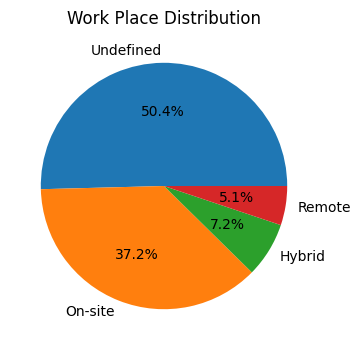

In [40]:
workplace_counts = df['Work_place'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(workplace_counts.values, labels=workplace_counts.index, autopct='%1.1f%%')
plt.title('Work Place Distribution')
plt.show()

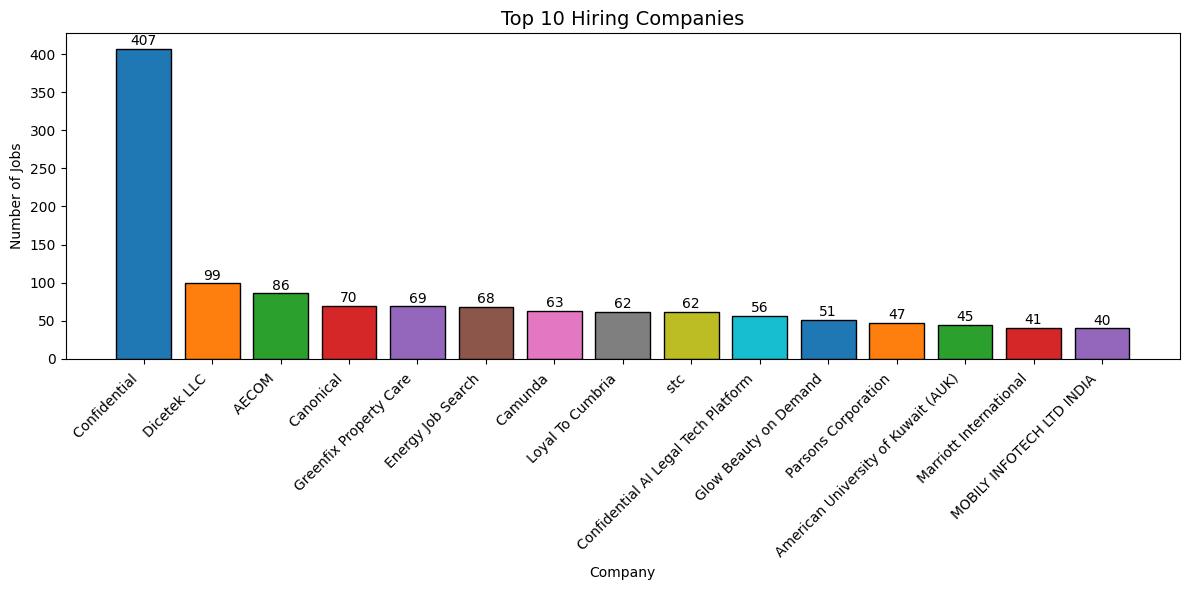

In [41]:

top_companies = df['Company'].value_counts().head(15)
plt.figure(figsize=(12,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
bars = plt.bar(top_companies.index, top_companies.values, color=colors, edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Hiring Companies', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


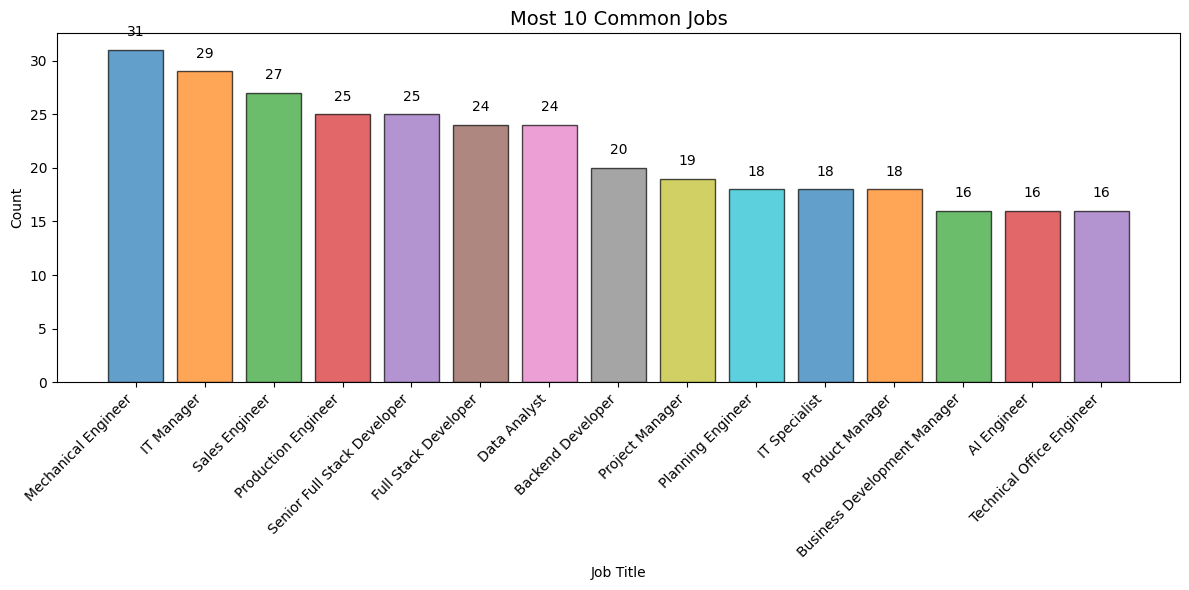

In [42]:

top_jobs = df['Job_title'].value_counts().head(15)
plt.figure(figsize=(12,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
bars = plt.bar(top_jobs.index, top_jobs.values, color=colors, edgecolor='black', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.title('Most 10 Common Jobs', fontsize=14)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


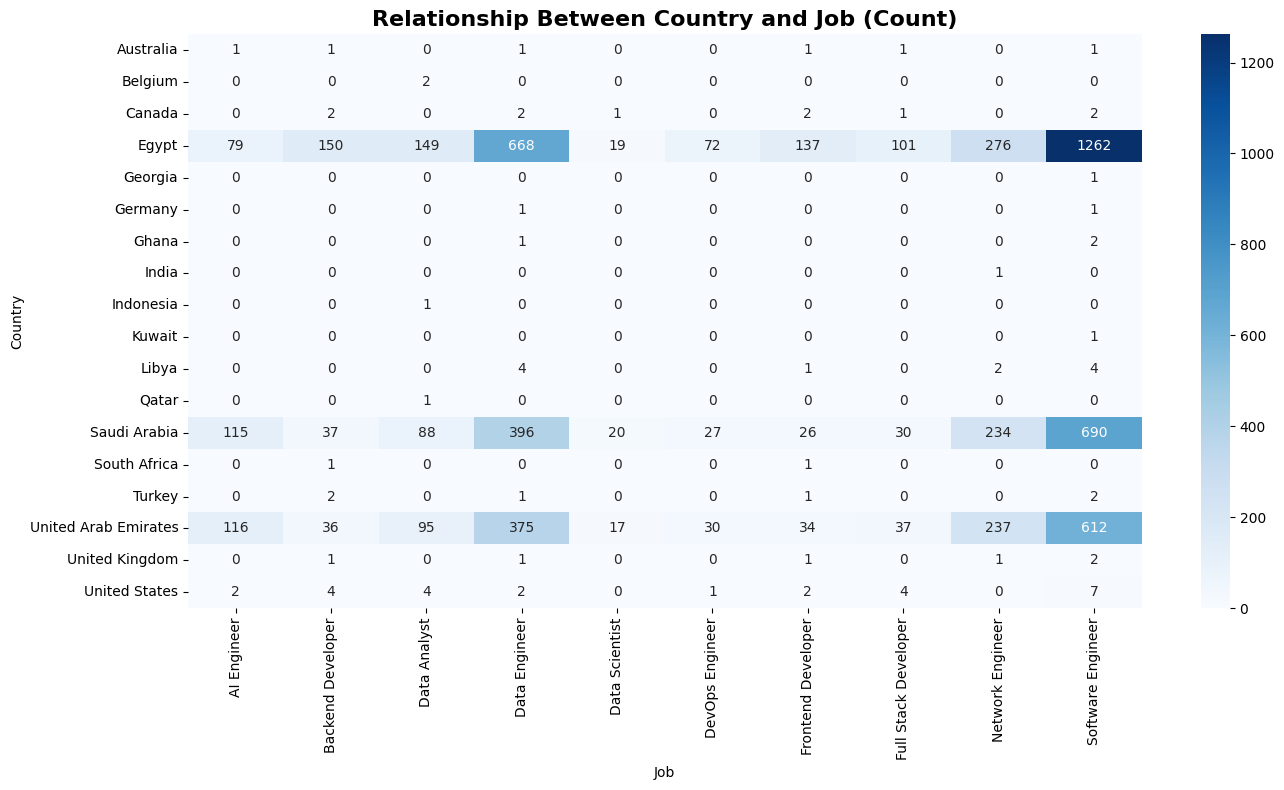

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df.groupby(['Country', 'Job']).size().unstack(fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(counts, annot=True, fmt="d", cmap="Blues")

plt.title("Relationship Between Country and Job (Count)", fontsize=16, fontweight='bold')
plt.xlabel("Job")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

In [44]:
print("""Insights – Relationship Between Country and Searched Job

1) Egypt shows the highest activity across all job categories
2) Saudi Arabia and United Arab Emirates are strong tech markets
3) Software Engineer is the most in-demand job across all countries
4) Data-related jobs show strong regional demand
5) Many countries show very low or zero activity:
   - Belgium, Georgia, Indonesia, Libya, Qatar, and India have only 0–2 job posts in most categories
""")


Insights – Relationship Between Country and Searched Job

1) Egypt shows the highest activity across all job categories
2) Saudi Arabia and United Arab Emirates are strong tech markets
3) Software Engineer is the most in-demand job across all countries
4) Data-related jobs show strong regional demand
5) Many countries show very low or zero activity:
   - Belgium, Georgia, Indonesia, Libya, Qatar, and India have only 0–2 job posts in most categories



# Part 4: Data Model (catboost)
this section is for the data predictions

In [45]:
import pandas as pd
import numpy as np
import os
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [46]:
def train_and_predict():
    # Load the Data
    filename = 'Cleaned_jobs.csv'
    
    print(f"Looking for file: {filename}")
    
    if not os.path.exists(filename):
        print("\n!!! FILE NOT FOUND ERROR !!!")
        print(f"Please make sure '{filename}' is in the same folder as this script.")
        return

    try:
        df = pd.read_csv(filename)
        print("Data loaded successfully.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return

    # Preprocessing & Debugging
    print("\nProcessing Data...")
    target_col = 'Work_place'
    
    # Definning features
    feature_cols = ['Company', 'Job', 'Country']

    for col in feature_cols:
        df[col] = df[col].astype(str)

    # Train Data: Rows where Work_place IS NOT NaN
    train_df = df.dropna(subset=[target_col]).copy()
    
    # Prediction Data: Rows where Work_place IS NaN
    predict_df = df[df[target_col].isna()].copy()

    print(f"Training on {len(train_df)} rows (Known Data).")
    print(f"Will predict for {len(predict_df)} rows (Missing Data).")

    X = train_df[feature_cols]
    y = train_df[target_col]

    # test_size to 0.3 (30% hidden for testing).
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize & Train CatBoost
    categorical_features_indices = list(range(len(feature_cols)))
    print(f"\nTraining model on known '{target_col}' labels using: {feature_cols}")
    

    model = CatBoostClassifier(
        iterations=50,      
        depth=3,             
        learning_rate=0.1,
        loss_function='MultiClass',
        cat_features=categorical_features_indices,
        l2_leaf_reg=3,       
        verbose=100
    )

    model.fit(X_train, y_train)

    # Evaluate Performance
    print("\n" + "="*40)
    print("MODEL PERFORMANCE (On Test Set)")
    print("="*40)
    
    y_pred_test = model.predict(X_test).flatten()
    acc = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy: {acc:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))

    # Generate Predictions for the WHOLE dataset
    print("\n" + "="*40)
    print("FILLING MISSING VALUES")
    print("="*40)
    
    # Predict for ALL rows
    all_predictions = model.predict(df[feature_cols]).flatten()
    
    # Get confidence scores
    all_probs = model.predict_proba(df[feature_cols])
    confidence_scores = [np.max(prob) for prob in all_probs]

    # Create new columns
    df['Predicted_Work_place'] = all_predictions
    df['Confidence_Score'] = [f"{score:.2%}" for score in confidence_scores]
    df['Final_Work_place'] = df[target_col].fillna(df['Predicted_Work_place'])
    
    # Flag rows 
    df['Was_Missing'] = df[target_col].isna()

    # New File
    output_filename = 'Predicted_jobs.csv'
    df.to_csv(output_filename, index=False, encoding='utf-8')
    
    print(f"Predictions complete.")
    print(f"New dataset saved as: {output_filename}")
    
    print("\nPreview of filled values:")
    if len(predict_df) > 0:
        preview_cols = feature_cols + ['Final_Work_place', 'Confidence_Score']
        print(df[df['Was_Missing']][preview_cols].head(10))
    else:
        print("No missing values were found to fill.")

if __name__ == "__main__":
    train_and_predict()

Looking for file: Cleaned_jobs.csv
Data loaded successfully.

Processing Data...
Training on 3096 rows (Known Data).
Will predict for 3148 rows (Missing Data).

Training model on known 'Work_place' labels using: ['Company', 'Job', 'Country']
0:	learn: 1.0148701	total: 145ms	remaining: 7.1s
49:	learn: 0.3860098	total: 1.34s	remaining: 0us

MODEL PERFORMANCE (On Test Set)
Accuracy: 91.71%

Classification Report:
              precision    recall  f1-score   support

      Hybrid       0.91      0.74      0.82       143
     On-site       0.92      0.98      0.95       702
      Remote       0.95      0.65      0.77        84

    accuracy                           0.92       929
   macro avg       0.93      0.79      0.85       929
weighted avg       0.92      0.92      0.91       929


FILLING MISSING VALUES
Predictions complete.
New dataset saved as: Predicted_jobs.csv

Preview of filled values:
                    Company            Job               Country  \
75               Canoni

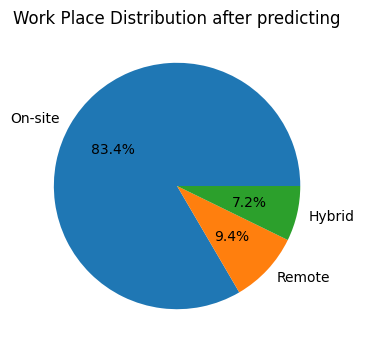

In [47]:
df_pre = pd.read_csv('Predicted_jobs.csv')
workplace_counts = df_pre['Final_Work_place'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(workplace_counts.values, labels=workplace_counts.index, autopct='%1.1f%%')
plt.title('Work Place Distribution after predicting')
plt.show()

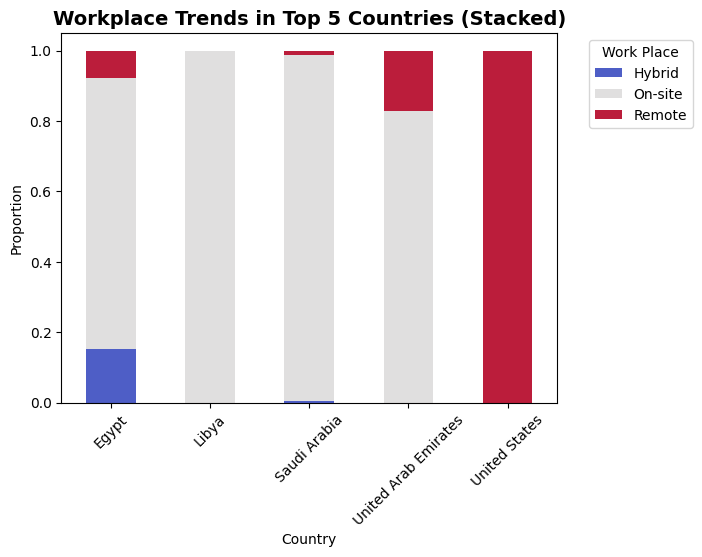

In [48]:
top_countries = df_pre['Country'].value_counts().nlargest(5).index
country_data = df_pre[df_pre['Country'].isin(top_countries)]
    
pd.crosstab(country_data['Country'], country_data['Final_Work_place'], normalize='index').plot(
        kind='bar', 
        stacked=True, 
        ax=plt.gca(), 
        colormap='coolwarm',
        alpha=0.9
    )
    
plt.title('Workplace Trends in Top 5 Countries (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Work Place', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

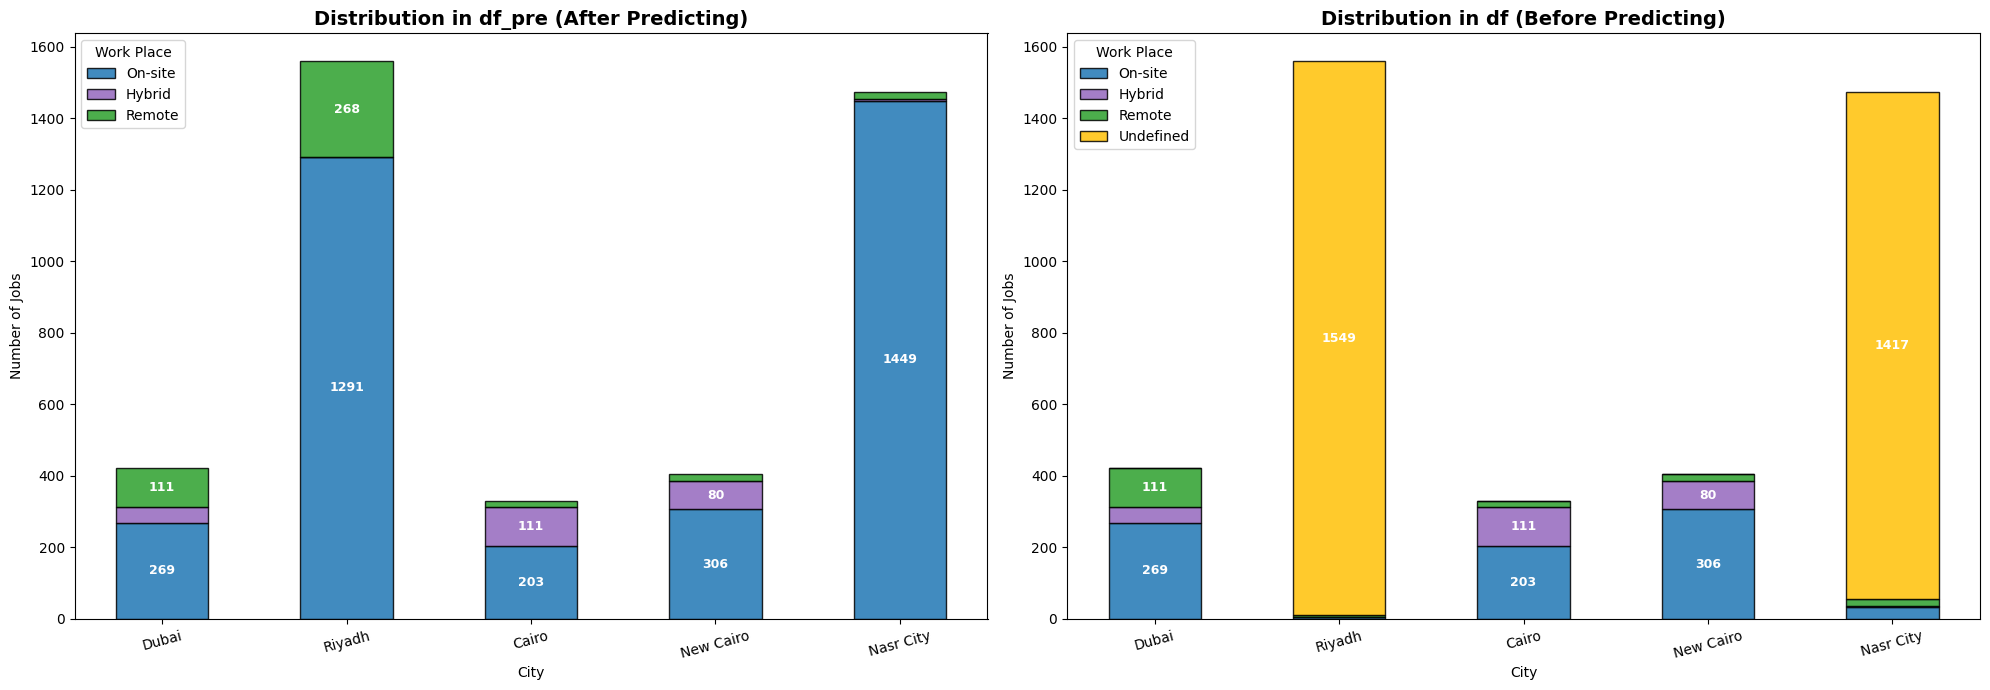

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7)) 

color_map = {
    'On-site': '#1f77b4',
    'Hybrid':  '#9467bd',
    'Remote':  '#2ca02c',
    'Undefined': '#FFC107'
}
bar_width = 0.5
threshold = 50

ax1 = axes[0] 

top_cities_pre = df_pre['City'].value_counts().head(5).index
work_places_pre = ['On-site', 'Hybrid', 'Remote'] 
grouped_pre = df_pre[df_pre['City'].isin(top_cities_pre)].groupby(['City', 'Final_Work_place']).size().unstack(fill_value=0)
grouped_pre = grouped_pre[work_places_pre]

bottom_y = np.zeros(len(top_cities_pre))

for wp in work_places_pre:
    values = grouped_pre[wp].values
    ax1.bar(
        top_cities_pre, 
        values, 
        width=bar_width, 
        label=wp, 
        color=color_map[wp], 
        edgecolor='black', 
        alpha=0.85, 
        bottom=bottom_y
    )
    
    for j, val in enumerate(values):
        if val > threshold:
            ax1.text(j, bottom_y[j] + val/2, str(int(val)), ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    
    bottom_y += values

ax1.set_title("Distribution in df_pre (After Predicting)", fontsize=14, fontweight='bold')
ax1.set_xlabel("City")
ax1.set_ylabel("Number of Jobs")
ax1.tick_params(axis='x', rotation=15)
ax1.legend(title="Work Place")

ax2 = axes[1] 
top_cities_curr = df['City'].value_counts().head(5).index
work_places_curr = ['On-site', 'Hybrid', 'Remote', 'Undefined'] 
grouped_curr = df[df['City'].isin(top_cities_curr)].groupby(['City', 'Work_place']).size().unstack(fill_value=0)
grouped_curr = grouped_curr[work_places_curr]

bottom_y = np.zeros(len(top_cities_curr)) 

for wp in work_places_curr:
    values = grouped_curr[wp].values
    ax2.bar(
        top_cities_curr, 
        values, 
        width=bar_width, 
        label=wp, 
        color=color_map[wp], 
        edgecolor='black', 
        alpha=0.85, 
        bottom=bottom_y
    )
    
    for j, val in enumerate(values):
        if val > threshold:
            ax2.text(j, bottom_y[j] + val/2, str(int(val)), ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    
    bottom_y += values

ax2.set_title("Distribution in df (Before Predicting)", fontsize=14, fontweight='bold')
ax2.set_xlabel("City")
ax2.set_ylabel("Number of Jobs") 
ax2.tick_params(axis='x', rotation=15)
ax2.legend(title="Work Place")

plt.tight_layout() 
plt.show()